https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

https://atlantico.my.trailhead.com/pt-BR/content/bootcamp_computacao_cognitiva/modules/visao__computacional/open__cv

#Dependencies

In [1]:
!pip install opencv-python
!pip install mahotas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, color
from skimage.filters import threshold_otsu
import mahotas
import argparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.3 MB/s 


#Functions used

In [2]:
def display_img(image,title='Image',x_label=None,y_label=None,cmap_type='gray',show_axis=False,colorBar=False,F_size=(8,6)):
  plt.figure(figsize=F_size)
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if colorBar: plt.colorbar()
  if not show_axis: plt.axis('off')
  plt.show()


#Loading the image

The following images will be examples to test the algorithms and pipelines. Be aware of these variable names, their respective images, and blurred and gray versions.

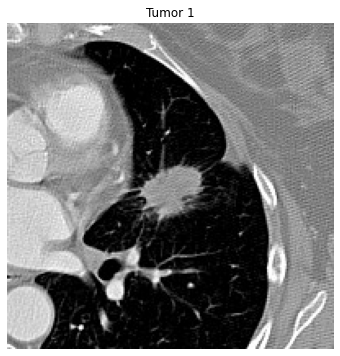

In [7]:
file_name = "maligno.jpg"

tumor_picture = plt.imread(file_name)
display_img(tumor_picture, title="Tumor 1",colorBar=False)

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)  # Getting the gray image
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)  # Getting the blurred image

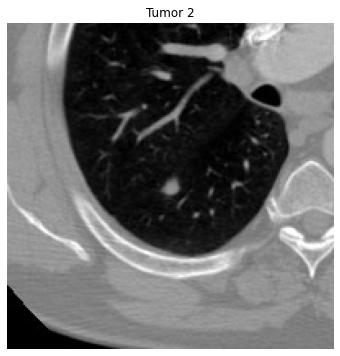

In [8]:
file_name = "maligno2.jpg"

tumor_picture_2 = plt.imread(file_name)
display_img(tumor_picture_2, title="Tumor 2",colorBar=False)

tumor_picture_2_gray = cv2.cvtColor(tumor_picture_2, cv2.COLOR_BGR2GRAY)  # Getting the gray image
tumor_picture_2_gray_blur = cv2.GaussianBlur(tumor_picture_2_gray, (21, 21), 0)  # Getting the blurred image

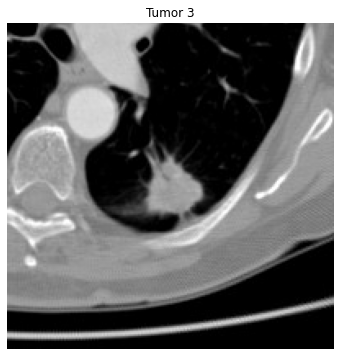

In [15]:
file_name = "maligno3.jpg"

tumor_picture_3 = plt.imread(file_name)
display_img(tumor_picture_3, title="Tumor 3",colorBar=False)

tumor_picture_3_gray = cv2.cvtColor(tumor_picture_3, cv2.COLOR_BGR2GRAY)  # Getting the gray image
tumor_picture_3_gray_blur = cv2.GaussianBlur(tumor_picture_3_gray, (21, 21), 0)  # Getting the blurred image

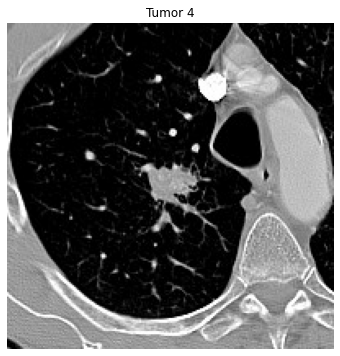

In [16]:
file_name = "maligno4.jpg"

tumor_picture_4 = plt.imread(file_name)
display_img(tumor_picture_4, title="Tumor 4",colorBar=False)

tumor_picture_4_gray = cv2.cvtColor(tumor_picture_4, cv2.COLOR_BGR2GRAY)  # Getting the gray image
tumor_picture_4_gray_blur = cv2.GaussianBlur(tumor_picture_4_gray, (21, 21), 0)  # Getting the blurred image

#Set up the initial variables

Instead of changing the variable name at each cell, set here image variable. 

In [57]:
tumor_picture=tumor_picture_4

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)


#chaging the color system of the picture.

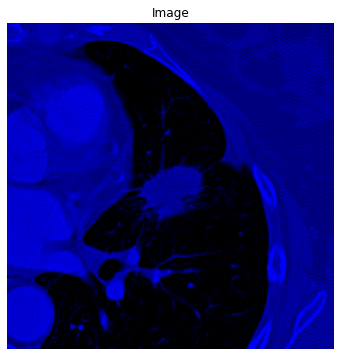

In [9]:
tumor_picture_system_color_changed = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2HSV)
display_img(tumor_picture_system_color_changed)

#Histogram of color channel

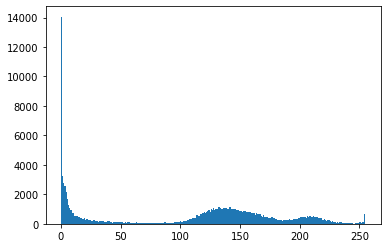

In [10]:
plt.hist(tumor_picture.ravel(), bins=256)
plt.show()

#Blur

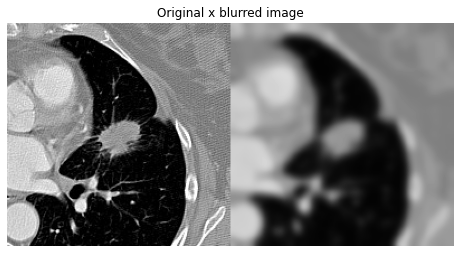

In [11]:
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

display_img( np.hstack([tumor_picture_gray, tumor_picture_gray_blur]), title='Original x blurred image')


Warning: Check whether the histogram bellow is correct.

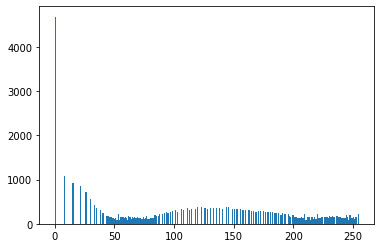

(200, 200)


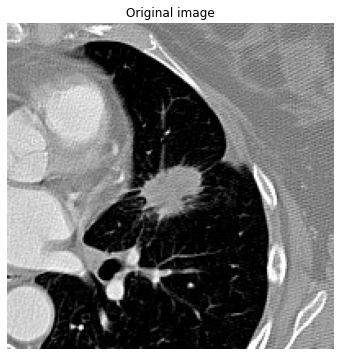

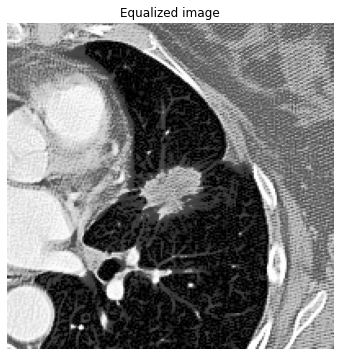

In [13]:
tumor_picture_eq = cv2.equalizeHist(tumor_picture_gray)

plt.hist(tumor_picture_eq.ravel(), bins=256)
plt.show()

print(tumor_picture_eq.shape)
display_img(tumor_picture_gray,title='Original image')
display_img(tumor_picture_eq, title="Equalized image",colorBar=False)



#Binarization

## Fixed Threshold

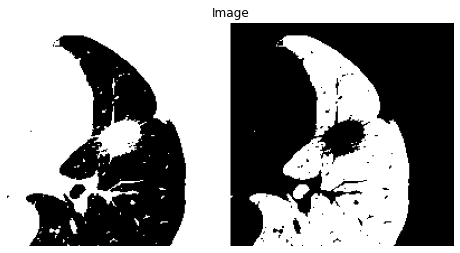

In [14]:
Threshold = 60

(t,bin1) = cv2.threshold(tumor_picture_gray, Threshold, 255, cv2.THRESH_BINARY) 
(t,bin2) = cv2.threshold(tumor_picture_gray, Threshold, 255, cv2.THRESH_BINARY_INV) 

display_img( np.hstack([bin1, bin2]))

## Multi Threshold

The following algorithm generates various images with different fixed Thresholds in order to visualise how the images change according to the new Thresholds. You can set up the initial and final thresholds and step as follows.

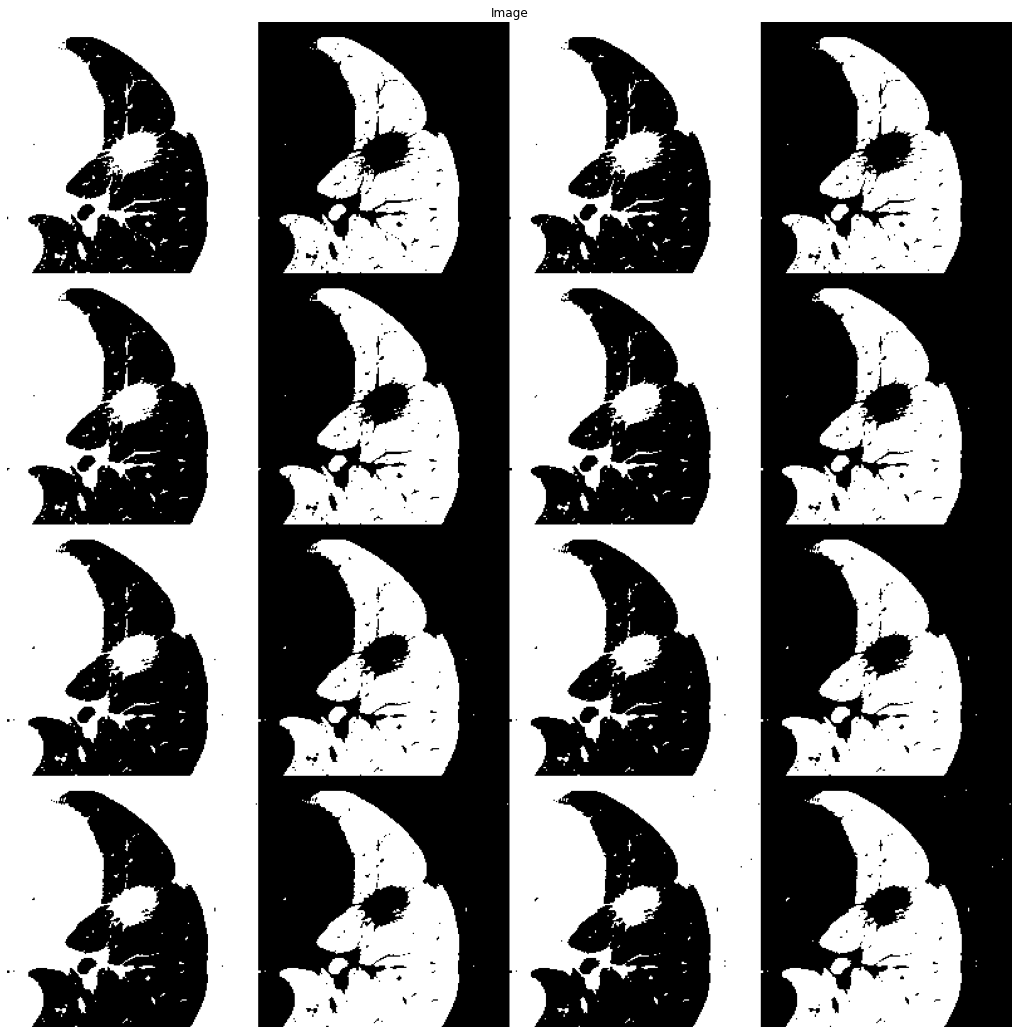

In [ ]:
matrix_of_thresholds = []
qtd_columns = 2
[initial_thresholds,final_thresholds] = [50,90]
step = 5
thresholds = initial_thresholds

while(True):
  
  row = []
  for index in range(qtd_columns):
    row.append(cv2.threshold(tumor_picture_gray, thresholds, 255, cv2.THRESH_BINARY)[1])
    row.append(cv2.threshold(tumor_picture_gray, thresholds, 255, cv2.THRESH_BINARY_INV)[1])
    thresholds+=step

  matrix_of_thresholds.append(np.hstack(row))
  if thresholds>=final_thresholds: break

result = np.vstack(matrix_of_thresholds)

display_img(result,F_size=(18,28))

##Threshold by using Otsu and Riddler-Calvard

I still need to figure out what's going on wrong here.

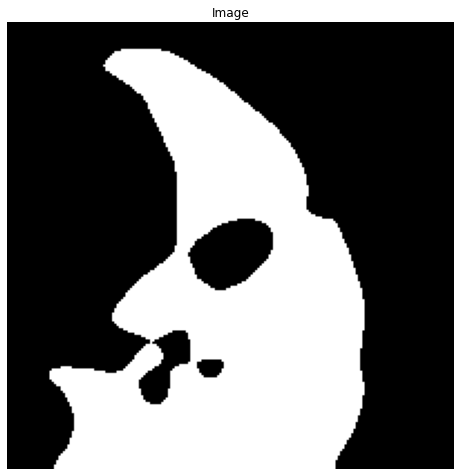

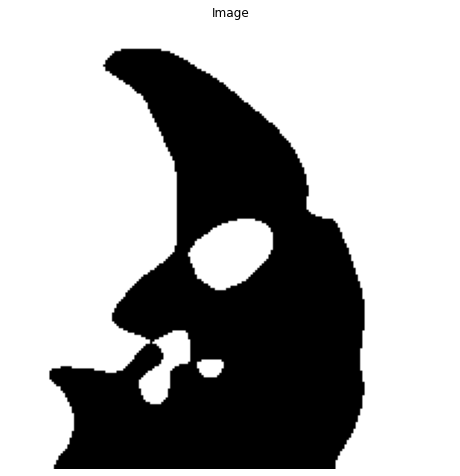

In [ ]:

tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

T = mahotas.thresholding.rc(tumor_picture_gray)
temp = tumor_picture_gray.copy() 
temp[temp > T] = 255 
temp[temp < 255] = 0 
temp = cv2.bitwise_not(temp) 
display_img(temp,F_size=(8,10))

T = mahotas.thresholding.otsu(tumor_picture_gray)
temp2 = tumor_picture_gray.copy() 
temp2[temp2 > T] = 255 
temp2[temp2 < 255] = 0 
temp2 = cv2.bitwise_not(temp) 
display_img(temp2,F_size=(8,10))

#result = np.vstack([tem2,temp3])


##Adaptive Threshold

According to https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html ,

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

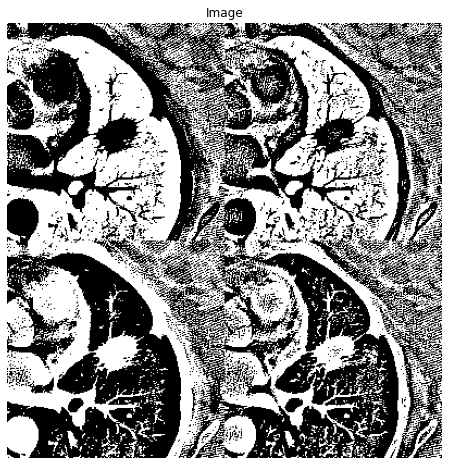

In [ ]:
blocksize = 41
central_value = 2
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)

th1 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,blocksize,central_value)
th2 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,blocksize,central_value)
th3 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blocksize,central_value)
th4 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksize,central_value)

result = np.vstack([  np.hstack([th1, th2]),  np.hstack([th3, th4])  ])   

display_img(result,F_size=(12,8))


#Border detection



##Sobel

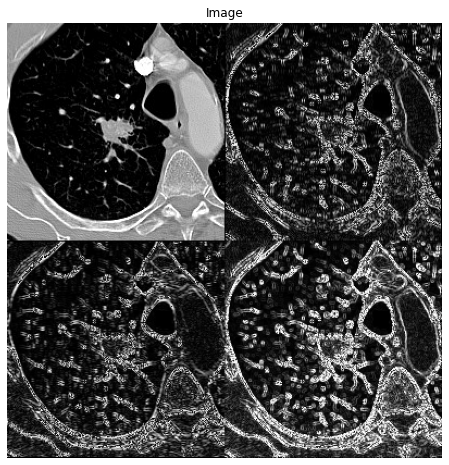

In [53]:
sobelX = cv2.Sobel(tumor_picture_gray, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(tumor_picture_gray, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

result = np.vstack([  np.hstack([tumor_picture_gray,sobelX]),np.hstack([sobelY, sobel])  ])   

display_img(result,F_size=(12,8))

## Laplacian Filter

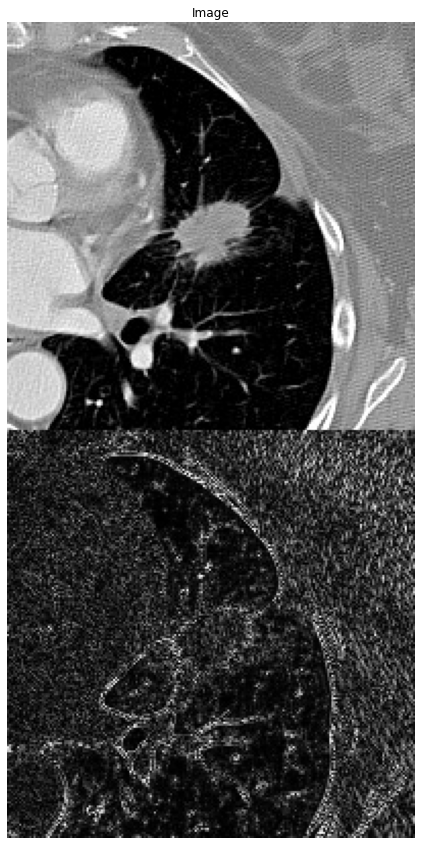

In [ ]:
threshold=60
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
#limiar_threshold = cv2.threshold(tumor_picture_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]
lap = cv2.Laplacian(tumor_picture_gray, cv2.CV_64F) 
lap = np.uint8(np.absolute(lap)) 
result = np.vstack([tumor_picture_gray, lap])  
display_img(result,F_size=(18,15))

## Canny

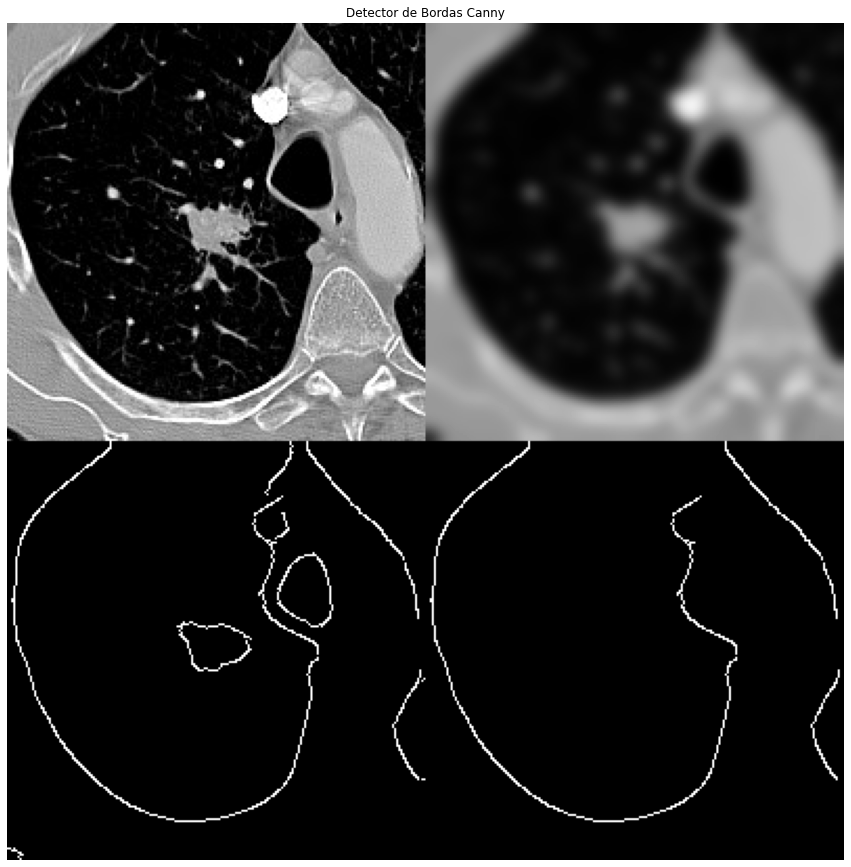

In [58]:
tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

canny1 = cv2.Canny(tumor_picture_gray_blur, 15, 120) 
canny2 = cv2.Canny(tumor_picture_gray_blur, 25, 200) 
result = np.vstack([  np.hstack([tumor_picture_gray,    tumor_picture_gray_blur ]),  np.hstack([canny1, canny2])  ])  
display_img(result, title = "Detector de Bordas Canny",F_size=(15,20)) 

#Pipelines

##Laplacian Filter + Otsu's thersholding

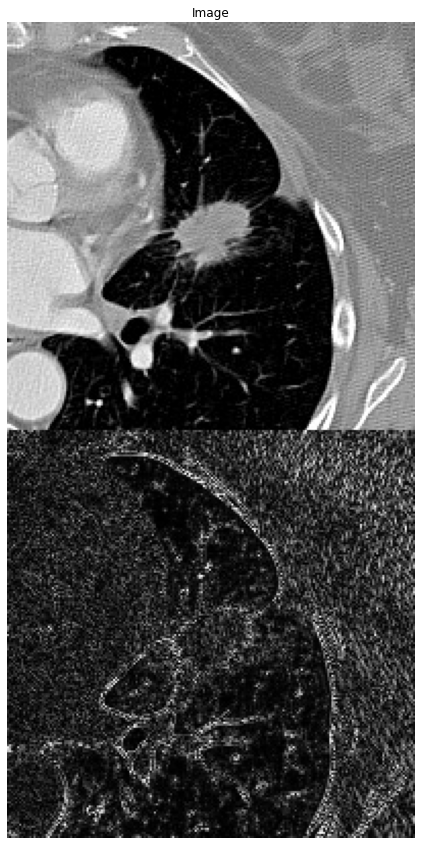

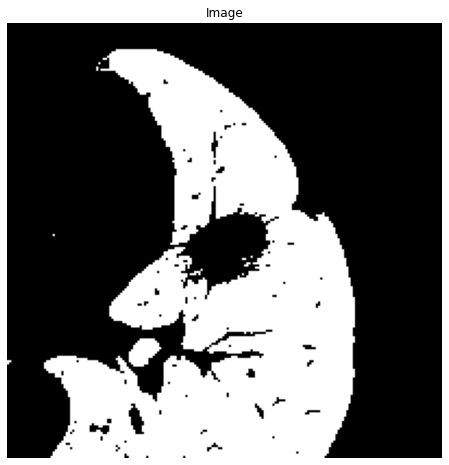

In [ ]:
threshold=60

lap = cv2.Laplacian(tumor_picture_gray, cv2.CV_64F) 
lap = np.uint8(np.absolute(lap)) 
result = np.vstack([tumor_picture_gray, lap])  
display_img(result,F_size=(18,15))

T = mahotas.thresholding.rc(lap) 
temp = tumor_picture_gray.copy() 
temp[temp > T] = 255 
temp[temp < 255] = 0 
temp = cv2.bitwise_not(temp) 

display_img(temp,F_size=(10,8))

## Fixed threshold + Sobel

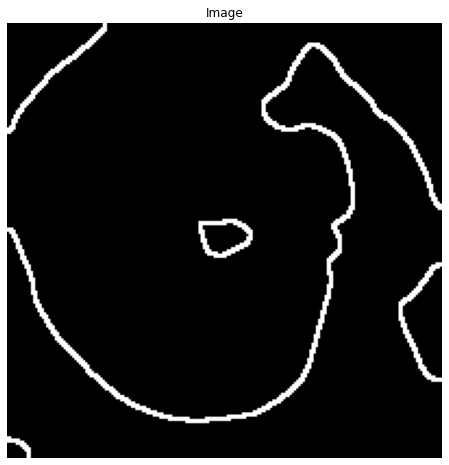

In [60]:
threshold = 130

tumor_picture_gray_threshold_blur = cv2.threshold(tumor_picture_gray_blur, threshold, 255, cv2.THRESH_BINARY_INV)[1]

sobelX = cv2.Sobel(tumor_picture_gray_threshold_blur, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(tumor_picture_gray_threshold_blur, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

#result = cv2.GaussianBlur(sobel, (21, 21), 0)

display_img(sobel,F_size=(12,8))

## Adaptive Threshold + Sobel

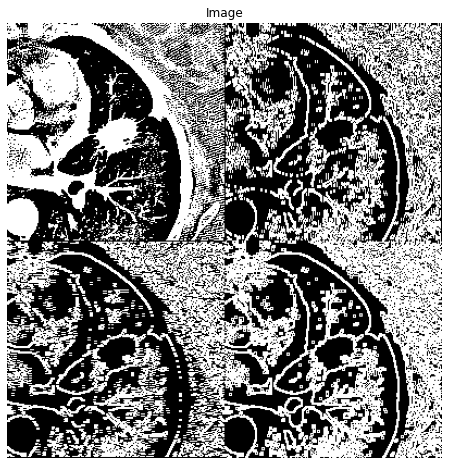

In [ ]:
blocksize = 71
central_value = 5
th4 = cv2.adaptiveThreshold(tumor_picture_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blocksize,central_value)

sobelX = cv2.Sobel(th4, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(th4, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

result = np.vstack([  np.hstack([th4,sobelX]),np.hstack([sobelY, sobel])  ])   

display_img(result,F_size=(12,8))

##Otsu’s thresholding + connected component analysis

The following code was obtained on: https://pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

The variable sobel was created by applying the fixed threshold and sobel.

infor examining component 1/6


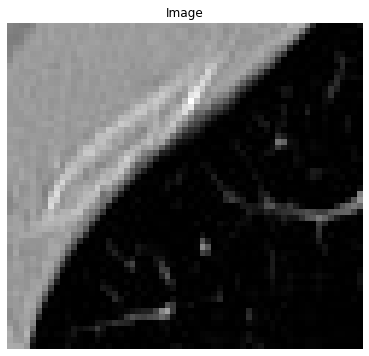

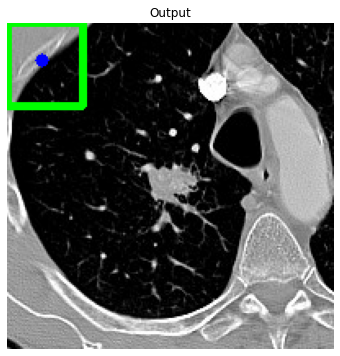

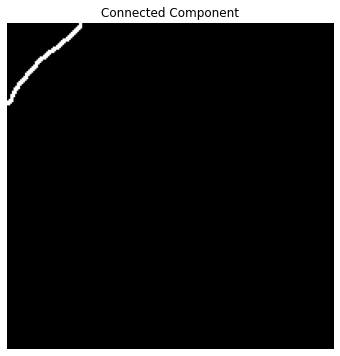

infor examining component 2/6


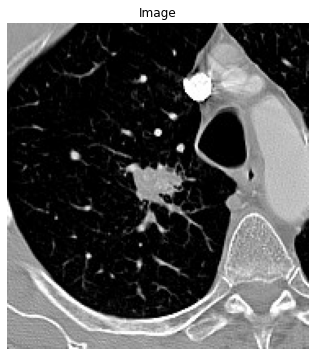

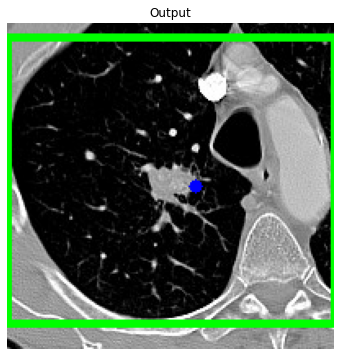

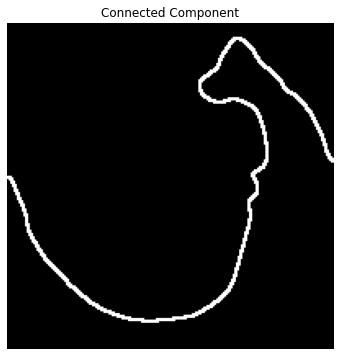

infor examining component 3/6


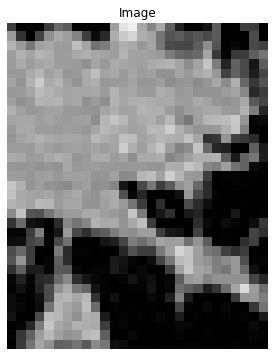

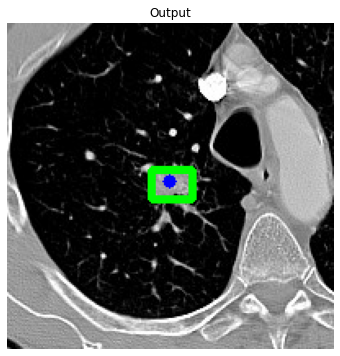

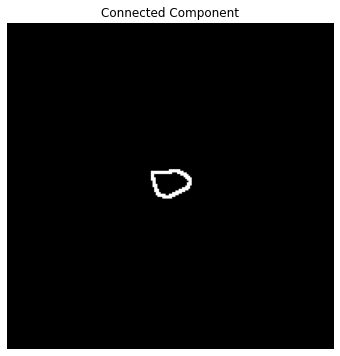

infor examining component 4/6


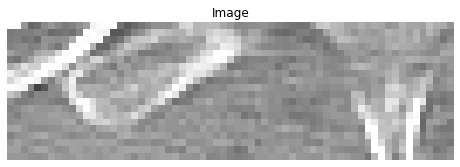

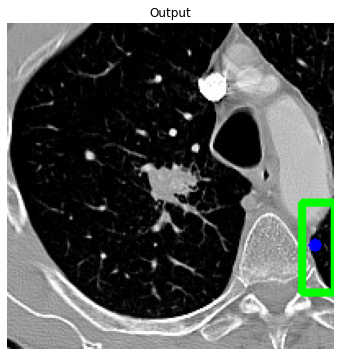

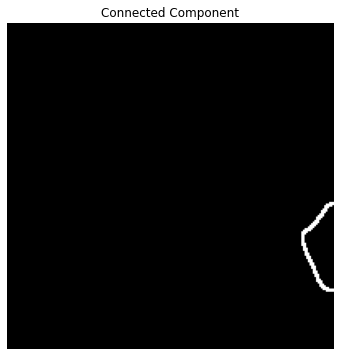

infor examining component 5/6


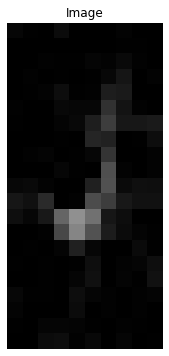

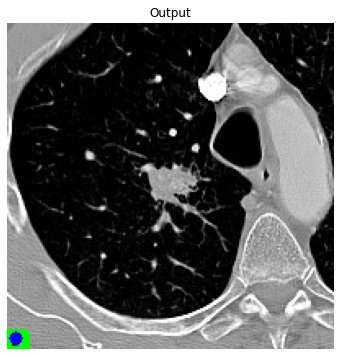

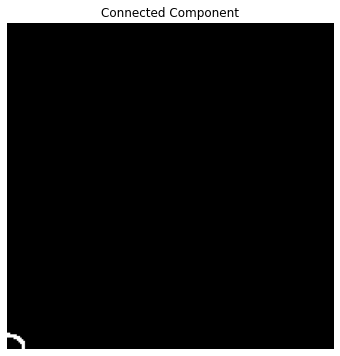

In [61]:
output = cv2.connectedComponentsWithStats(sobel, 4, cv2.CV_32S)

(numLabels, labels, stats, centroids) = output


for i in range(0,numLabels):
  
  if i is not 0:
    
    print('infor examining component {}/{}'.format(i,numLabels))
    x = stats[i,cv2.CC_STAT_LEFT]
    y = stats[i,cv2.CC_STAT_TOP]
    w = stats[i,cv2.CC_STAT_WIDTH]
    h = stats[i,cv2.CC_STAT_HEIGHT]
    area = stats[i,cv2.CC_STAT_AREA]
    (cX,cY) = centroids[i]
    result = tumor_picture.copy()
    image_slice = result[x:x + w+10,y:y + h+10]
    display_img(image_slice)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(result, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    componentMask = (labels == i).astype("uint8") * 255
    display_img(result,title="Output")
    display_img(componentMask,title="Connected Component")
    